![Images](Images/ITAcademy.png)
# CIÈNCIA DE DADES: M09.T01
#### Created by: Dani Planas Montserrat


In [109]:

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import statistics
#Import library MySql
import mysql.connector

#Import Library Preprocessing and modeling
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Import Library
from ip2geotools.databases.noncommercial import DbIpCity


warnings.filterwarnings('ignore')


In [110]:
#************************************************************************************
#***************************     READ Files Functions      **************************
#************************************************************************************
#Function for Read *.csv file (Import Data)
def openFileTXT(path_name):
    
    # Read *.csv file (Import Data)
    df = pd.read_csv(path_name, sep=',', names=movie_column_l, encoding = 'ISO-8859-1', index_col=0, engine='python')

    return df

#Function for Read *.txt file (Import Data)
def openFileTable(path_name, file_name, separator, movie_column_l):

    # Read *.txt file (Import Data)
    df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    
    return df

#Function for Read *.parquet file (Import Data)
def openFileParquet(path_name, file_name):
    
    #Import library pyarrow for read files with extenison "parquet" 
    import pyarrow 
    # Read *.txt file (Import Data)
    #df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    df = pd.read_parquet(path_name + file_name, engine='pyarrow')
    
    return df




In [111]:
#************************************************************************************
#******************************      PLOT Functions     *****************************
#************************************************************************************
#Function plot, type Histogram (one categoric value)
def plotHistogram(df):
    
    # create a dataset
    height = df
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['green'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Histogram (one Numeric value)
def plotHistogram2(df,paramNum):
    
    # create a dataset
    height = df[paramNum]
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['yellow'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

def plotDensityPlot(df):
    # library & dataset
    import seaborn as sns
    
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
    sns.set(style="darkgrid")

    # plotting both distibutions on the same figure
    fig = sns.kdeplot(df, shade=True, color="r")
    #fig = sns.kdeplot(df[paramNum2], shade=True, color="b")

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type ScatterPlot
def plotSnsScatterplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type LinePlot
def plotSnsLineplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.lineplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type HistPlot
def plotSnsHistplot(df, paramNum1, title, ylabel, xlabel, binsNum):
  
    sns.histplot(data=df, x=paramNum1, bins=binsNum, kde=True)
    #g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Stacked Area Chart (with 3 numeric values and 1 categoric value)   
def plotBarplotMultiple(df, paramNum1, paramNum2, paramNum3, Sel3):
        # libraries
        import numpy as np
        import matplotlib.pyplot as plt

        # width of the bars
        barWidth = 0.3
        
        # Choose the height of the blue bars
        bars1 = df

        if (Sel3 == 2):
            # Choose the height of the cyan bars
            bars2 = df[paramNum2] 

        if (Sel3 == 3):
            # Choose the height of the cyan bars
            bars3 = df[paramNum3] 
        
        # Choose the height of the error bars (bars1)
        yer1 = np.arange(len(bars1))

        # Choose the height of the error bars (bars2)
        yer2 = np.arange(len(bars1))
        
        #print(title) by groups of bars
        title = df.index 
        
        # The x position of bars
        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]

        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer1, capsize=5, label=paramNum1)
        
        if (Sel3 == 2):
            # Create cyan bars
            plt.bar(r2, bars2, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum2)

        if (Sel3 == 3):
             # Create cyan bars
             plt.bar(r3, bars3, width = barWidth, color = 'green', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum3)
   
        # general layout
        plt.xticks([r + barWidth for r in range(len(bars1))], title)
        plt.ylabel('height')
        #plt.legend()

        # Show graphic
        fig = plt.gcf()
        plt.show()

        return fig

#Function plot, show a World Map with Geolocation points from a dataset
def plotWorldMapGeolocPoints(df, pLatitud, pLongitud):

        bars3 = df[pLatitud] 

        #Dibujar mapas
        from mpl_toolkits.basemap.test import Basemap
        import matplotlib.pyplot as plt


        #Figure Size
        plt.figure(figsize=(16,12))

        #Projection Type : robin, ortho ...
        my_map=Basemap(projection='robin',lon_0=0,lat_0=0)  #'robin' ,'ortho'

        #Draw cost lines and countries
        my_map.drawcoastlines()
        my_map.drawcountries()

        #Define colours
        my_map.drawcountries(color='#303338')
        my_map.drawmapboundary(fill_color='#c0eaff')
        my_map.drawcoastlines(color='#324c87')
        my_map.fillcontinents(color='#ebe7d5', lake_color='#c0eaff')


        #Place the different locations on the map
        for i in range(len(df[pLongitud])):     
            x,y = my_map(df[pLongitud][i], df[pLatitud][i])
            my_map.plot(x,y, color='g', marker = 'o' , markersize=10 , alpha = 0.9)

        return my_map
    

In [112]:
#************************************************************************************
#***************************     GEOLOCATION Functions     **************************
#************************************************************************************

/#Function that give us information on the location of an IP adress (Country, latitude, altitude,..)
def getInfoGeolocation(x, num):
    

    
    response = DbIpCity.get(x, api_key='free')
    
    #(1) Return Name of country
    if num==1:
        exit = response.country
    #(2) Return Name of country
    if num==2:
        exit = response.latitude
    #(3) Return Name of country
    if num==3:
        exit = response.longitude
   
    #ip = str(dfLogWeb['IP'][1])
    #response = DbIpCity.get(ip, api_key='free')
    #response.ip_address
    #print(response.city)
    #print(response.region)
    #print(response.country)

    #print(response.latitude)
    #print(response.longitude)
    #print(response.to_json())
    return exit



In [113]:
#************************************************************************************
#***************************        SAMPLE Functions       **************************
#************************************************************************************
#Function for doing a Simple Random Sampling from a dataset
def simpleSampling(df, num_sample):
    
    dfSample = df.sample(num_sample)          # Select X sample points from dataset
    return dfSample                           # Return result

# Function for doing a Systematic Sampling from dataset
def systematicSampling(df, start, step):
 
    indexes = np.arange(start, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

# Function for doing a Stratified Sampling from dataset (able for 3 subgroups)
def stratifiedSampling3Group(df, group, subgName1, subgName2, subgName3, samplePercentage):
 
    # STEP1: Divide de Group in subgroups (STRATA)
    group1_df = df.groupby(group)
    group1_df = group1_df.get_group(subgName1)
    nReg_group1 = len(group1_df)
#   print('Regsitros Grupo 1:', nReg_group1)
#   display(group1_df)

    group2_df = df.groupby(group)
    group2_df = group2_df.get_group(subgName2)
    nReg_group2 = len(group2_df)
#   print('Regsitros Grupo 2:', nReg_group2)
#   display(group2_df)

    group3_df = df.groupby(group)
    group3_df = group3_df.get_group(subgName3)
    nReg_group3 = len(group3_df)
#   print('Regsitros Grupo 3:', nReg_group3)
#   display(group3_df)
    
    # STEP 2: get a percentage from each group
    group11_df = group1_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group12_df = group2_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group13_df = group3_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))

    # STEP 3: 
    dfNew = pd.concat([group11_df, group12_df])
    dfNew = pd.concat([dfNew, group13_df])

    return dfNew

# Function for doing a Systematic Sampling from dataset
def reservoirSampling(df, k):
          
    #Import library
    import random
    
    # Create as stream generator
    #stream = dfRunners20['athlete']
    stream = df.index
    # Doing Reservoir Sampling from the stream
    #k=6
    reservoir = []
    for i, element in enumerate(stream):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element

    print(reservoir)
    print(len(reservoir))

    #Define new dataframe
    df_Sample = pd.DataFrame()

    #Create a New dataframe with values selected from reservoir sampling
    for i in range(len(reservoir)):
        num = reservoir[i]
        df_Sample = df_Sample.append(df.loc[num],ignore_index=True)
        
    return df_Sample

In [114]:
#************************************************************************************
#********************       LINEAR REGRESSION Functions          ********************
#************************************************************************************
# Function that Split data in train and test:
def split_TrainTest(df, Xparam, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    #Split the data into Train(70%) and Test(30%)
    X = df[Xparam]
    y = df[Yparam]

    # Split data in Train () & Test
    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y,
                                            test_size=0.3,
                                            random_state = 1)

    # Create the Model with Train & Test
    model = sm.OLS(endog=y_train, exog=X_train,)
    model = model.fit()
    print(model.summary())
    return model, X_train, X_test, y_train, y_test 


# Function that Split data in train and test:
def split_TrainTest_KNN(df, Xparam, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    from sklearn.neighbors import KNeighborsClassifier
    
    #Split the data into Train(70%) and Test(30%)
    X = df[Xparam]
    y = df[Yparam]

    # Split data in Train () & Test
    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y,
                                            test_size=0.3,
                                            random_state = 1)

    # Create the Model with Train & Test
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Classifier
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    
    #print(model.summary())
    return classifier, X_train, X_test, y_train, y_test 

In [115]:
#************************************************************************************
#***************************     Correlation Functions     **************************
#************************************************************************************
#Function for convert a correlation matrix in "tidy" format
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['var_1','var_2','r']
    corr_mat = corr_mat.loc[corr_mat['var_1'] != corr_mat['var_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [116]:
#Import Library
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Virtual\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [117]:
##########################################################################
##                 DATA SCIENCE: M09.T01: Exercici 1                    ##
##########################################################################
# Exercici 1: Agafa un text en anglès que vulguis, i calcula'n la 
# freqüència de les paraules.


#Import Libraries
import nltk  # NLTK library
#nltk.download()
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize

text="""French astronaut Thomas Pesquet spent six months aboard the International 
     Space Station last year, and his view of the Earth was as alarming as it was breathtaking.
     Long periods with his feet off solid ground gave him a unique and privileged perspective on 
     our planet. His Instagram account is bursting with beautiful images of “the blue ball we 
     call home.” But the beauty is tainted. Pesquet says that even from space the effects of 
     climate change are visible.
     He says that since his previous visit to space, in 2016, the consequences of human activity 
     have become even more apparent, with glaciers visibly retreating, and a rise in extreme 
     weather events."""

tokenized_text=sent_tokenize(text)
print(tokenized_text)



['French astronaut Thomas Pesquet spent six months aboard the International \n     Space Station last year, and his view of the Earth was as alarming as it was breathtaking.', 'Long periods with his feet off solid ground gave him a unique and privileged perspective on \n     our planet.', 'His Instagram account is bursting with beautiful images of “the blue ball we \n     call home.” But the beauty is tainted.', 'Pesquet says that even from space the effects of \n     climate change are visible.', 'He says that since his previous visit to space, in 2016, the consequences of human activity \n     have become even more apparent, with glaciers visibly retreating, and a rise in extreme \n     weather events.']


In [118]:
from nltk.tokenize import word_tokenize

# Split a text in words
tokenized_word=word_tokenize(text)

print(tokenized_word)              # Print Result

['French', 'astronaut', 'Thomas', 'Pesquet', 'spent', 'six', 'months', 'aboard', 'the', 'International', 'Space', 'Station', 'last', 'year', ',', 'and', 'his', 'view', 'of', 'the', 'Earth', 'was', 'as', 'alarming', 'as', 'it', 'was', 'breathtaking', '.', 'Long', 'periods', 'with', 'his', 'feet', 'off', 'solid', 'ground', 'gave', 'him', 'a', 'unique', 'and', 'privileged', 'perspective', 'on', 'our', 'planet', '.', 'His', 'Instagram', 'account', 'is', 'bursting', 'with', 'beautiful', 'images', 'of', '“', 'the', 'blue', 'ball', 'we', 'call', 'home.', '”', 'But', 'the', 'beauty', 'is', 'tainted', '.', 'Pesquet', 'says', 'that', 'even', 'from', 'space', 'the', 'effects', 'of', 'climate', 'change', 'are', 'visible', '.', 'He', 'says', 'that', 'since', 'his', 'previous', 'visit', 'to', 'space', ',', 'in', '2016', ',', 'the', 'consequences', 'of', 'human', 'activity', 'have', 'become', 'even', 'more', 'apparent', ',', 'with', 'glaciers', 'visibly', 'retreating', ',', 'and', 'a', 'rise', 'in', 

In [119]:
# Import libraries
from nltk.probability import FreqDist

# Call function to know the frecuency of samples
fdist = FreqDist(tokenized_word)
print(fdist)                      # Print Result

<FreqDist with 90 samples and 122 outcomes>


In [120]:
# Call function to know the two most used words
fdist.most_common(4)

[('the', 6), (',', 5), ('.', 5), ('of', 4)]

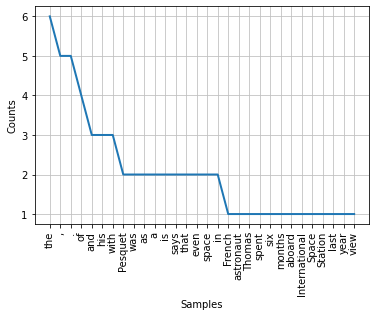

In [121]:
# Frecuency distribution Plot

# Import Library
import matplotlib.pyplot as plt

fdist.plot(30,cumulative=False)
plt.show()

<span style=color:green><b>FEQÜÈNCIA DE PARAULES</u></b></span> 


Després de l'anlàsis anterior podem observar que les paraules amb més freqüència que trobem en el text són "the"  amb una freqüència de 6, segueides dels caràcters "," i "." amb una freqüncia de 5 i la paraula "of" amb una freqüència de 4.


In [122]:
##########################################################################
##                 DATA SCIENCE: M09.T01: Exercici 2                    ##
##########################################################################
# Exercici 2: Treu les stopwords i realitza stemming al teu conjunt de dades.

#import library
import nltk
nltk.download('stopwords')
    
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

print("Les 'Stop words' són les següents:")
print(stop_words)




Les 'Stop words' són les següents:
{'am', 'so', 's', 'his', "won't", 'should', 'both', 'them', 'mustn', 'most', 'i', 'here', "you've", 'o', 'into', 'has', 'then', 'further', 'herself', 'to', 'out', 'been', 'before', 'any', 'an', 'now', 're', 'itself', "couldn't", 'hasn', 'was', 'who', 'this', 'had', 'after', 'do', 'ain', 'no', "haven't", 'down', 'where', "that'll", 'couldn', 'won', 'he', 'can', "hasn't", "needn't", 'they', 'it', 'through', 'd', "you're", 'at', "shan't", 'shouldn', 'me', 'these', 'for', "didn't", 'in', 'during', 'will', "don't", "weren't", 'is', 'y', 'as', 'all', 'such', 'wouldn', 'whom', 'there', 'did', 'if', 'same', 'ourselves', 'its', "aren't", 'and', 'the', 'aren', 'again', "she's", 'ours', 'by', 'until', 'each', 'up', 'of', 'but', 'against', "you'd", 'you', 'didn', 'does', 'himself', 'she', 'having', 'ma', 'from', "it's", 'how', 'nor', 'because', 'why', "hadn't", 'hers', 'yourselves', 'above', 've', 'don', 'a', 'm', 'be', "shouldn't", 'themselves', "wasn't", "would

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Virtual\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
filtered_sent=[]

# Do a bucle to drop the "stop words" from our sentence
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)

# Print the Results
print("Frase Original:",tokenized_word)
print("")
print("Frase sense 'Stopword':",filtered_sent)

Frase Original: ['French', 'astronaut', 'Thomas', 'Pesquet', 'spent', 'six', 'months', 'aboard', 'the', 'International', 'Space', 'Station', 'last', 'year', ',', 'and', 'his', 'view', 'of', 'the', 'Earth', 'was', 'as', 'alarming', 'as', 'it', 'was', 'breathtaking', '.', 'Long', 'periods', 'with', 'his', 'feet', 'off', 'solid', 'ground', 'gave', 'him', 'a', 'unique', 'and', 'privileged', 'perspective', 'on', 'our', 'planet', '.', 'His', 'Instagram', 'account', 'is', 'bursting', 'with', 'beautiful', 'images', 'of', '“', 'the', 'blue', 'ball', 'we', 'call', 'home.', '”', 'But', 'the', 'beauty', 'is', 'tainted', '.', 'Pesquet', 'says', 'that', 'even', 'from', 'space', 'the', 'effects', 'of', 'climate', 'change', 'are', 'visible', '.', 'He', 'says', 'that', 'since', 'his', 'previous', 'visit', 'to', 'space', ',', 'in', '2016', ',', 'the', 'consequences', 'of', 'human', 'activity', 'have', 'become', 'even', 'more', 'apparent', ',', 'with', 'glaciers', 'visibly', 'retreating', ',', 'and', 'a'

In [124]:
# Frecuency from Original tokenized text
fdist = FreqDist(tokenized_word)
print(fdist)                            # Print Result


# Frecuency from Original tokenized text
fdist = FreqDist(tokenized_word)
print(fdist)                            # Print Result

<FreqDist with 90 samples and 122 outcomes>
<FreqDist with 90 samples and 122 outcomes>


In [125]:
stemming_word=[]

#Import Library
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

#create an object of class PorterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()

# Do a bucle to steaming the words from our sentence
for w in tokenized_word:
    if w not in stop_words:
        stemming_word.append(porter.stem(w))
        
print("Tokenized Sentence:",tokenized_word)
print("")
print("Filterd Sentence:",stemming_word)

Tokenized Sentence: ['French', 'astronaut', 'Thomas', 'Pesquet', 'spent', 'six', 'months', 'aboard', 'the', 'International', 'Space', 'Station', 'last', 'year', ',', 'and', 'his', 'view', 'of', 'the', 'Earth', 'was', 'as', 'alarming', 'as', 'it', 'was', 'breathtaking', '.', 'Long', 'periods', 'with', 'his', 'feet', 'off', 'solid', 'ground', 'gave', 'him', 'a', 'unique', 'and', 'privileged', 'perspective', 'on', 'our', 'planet', '.', 'His', 'Instagram', 'account', 'is', 'bursting', 'with', 'beautiful', 'images', 'of', '“', 'the', 'blue', 'ball', 'we', 'call', 'home.', '”', 'But', 'the', 'beauty', 'is', 'tainted', '.', 'Pesquet', 'says', 'that', 'even', 'from', 'space', 'the', 'effects', 'of', 'climate', 'change', 'are', 'visible', '.', 'He', 'says', 'that', 'since', 'his', 'previous', 'visit', 'to', 'space', ',', 'in', '2016', ',', 'the', 'consequences', 'of', 'human', 'activity', 'have', 'become', 'even', 'more', 'apparent', ',', 'with', 'glaciers', 'visibly', 'retreating', ',', 'and',

In [128]:
##########################################################################
##                 DATA SCIENCE: M09.T01: Exercici 3                    ##
##########################################################################
# Exercici 3: Realitza sentiment analysis al teu conjunt de dades.

#Import library
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize




# Take the text tokenized Before and do the SENTIMENT ANALYSIS 
for sentence in tokenized_text:
    print(sentence)
    scores = analizador.polarity_scores(text)
    for key in scores:
       print(key, ': ', scores[key])
       print()


French astronaut Thomas Pesquet spent six months aboard the International 
     Space Station last year, and his view of the Earth was as alarming as it was breathtaking.
neg :  0.011

neu :  0.869

pos :  0.12

compound :  0.8934

Long periods with his feet off solid ground gave him a unique and privileged perspective on 
     our planet.
neg :  0.011

neu :  0.869

pos :  0.12

compound :  0.8934

His Instagram account is bursting with beautiful images of “the blue ball we 
     call home.” But the beauty is tainted.
neg :  0.011

neu :  0.869

pos :  0.12

compound :  0.8934

Pesquet says that even from space the effects of 
     climate change are visible.
neg :  0.011

neu :  0.869

pos :  0.12

compound :  0.8934

He says that since his previous visit to space, in 2016, the consequences of human activity 
     have become even more apparent, with glaciers visibly retreating, and a rise in extreme 
     weather events.
neg :  0.011

neu :  0.869

pos :  0.12

compound :  0.8934



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Virtual\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
